In [2]:
import sys
!{sys.executable} -m pip install torch torchvision matplotlib tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 47s 0us/step


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

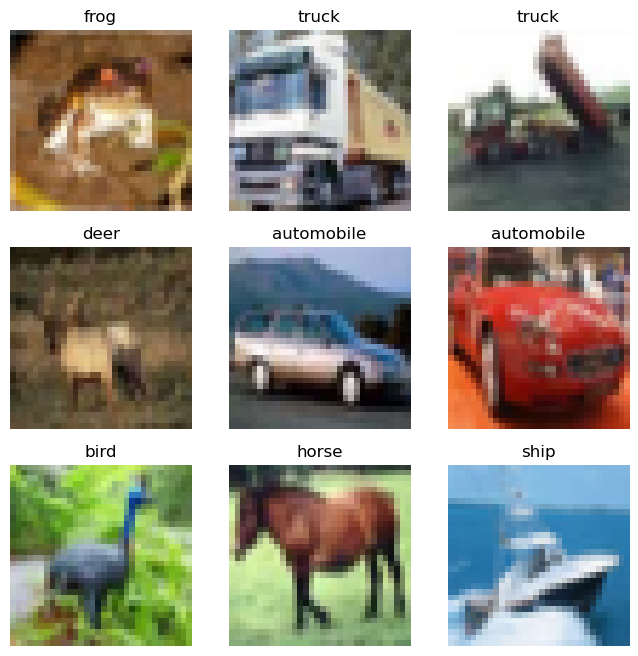

In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

In [7]:
model = models.Sequential()

# Layer 1
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

# Layer 2
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# Layer 3
model.add(layers.Conv2D(64,(3,3),activation='relu'))

# Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

C:\Users\lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.4251 - loss: 1.5734 - val_accuracy: 0.5281 - val_loss: 1.3054
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.5682 - loss: 1.2123 - val_accuracy: 0.5836 - val_loss: 1.1737
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6284 - loss: 1.0553 - val_accuracy: 0.6240 - val_loss: 1.0514
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.6630 - loss: 0.9546 - val_accuracy: 0.6742 - val_loss: 0.9353
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6912 - loss: 0.8777 - val_accuracy: 0.6743 - val_loss: 0.9522
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7140 - loss: 0.8175 - val_accuracy: 0.6891 - val_loss: 0.8980
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7308 - loss: 0.7653 - val_accuracy: 0.6767 - val_loss: 0.9450
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.7477 -

In [10]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7124 - loss: 0.8714
Accuracy: 0.7124000191688538


In [11]:
pred = model.predict(x_test)
print(class_names[pred[0].argmax()])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
cat


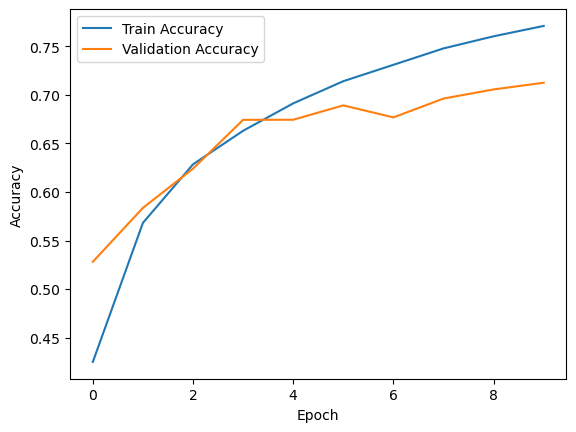

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()